## Gradient Descent

- Objective in many data sci problems is finding model that fits our situation the best
- Best: minimize error of prediction. In other words, we need to solve optimization problem

#### Idea of Gradient Descent
- Given a function that consumes a vector of real numbers and produces a real number, we need to minimize these functions.
- Maximize, Minimize: Find v such that the largest or smallest output is output
- Gradient: Partial Derivative vector, gives input direction of where function most quickly increases.
- Maximizing Function: 
    - Pick random point, calculate gradient, take step in gradient direction, repeat
- Minimizing Function:
    - Pick random point, calculate gradient, take step opposite to gradient direction, repeat
- In 3D space:
<img src=attachment:image.png width="300">
 
- If function has 1 local minima, very likely to find, multiple less likely,infinite local minimima, function may go on forever


#### Estimating Gradient

- Derivative Function with newton's quotient:

```python
from typing import Callable
def difference_quotient(f: Callable[[float],float],
                        x: float,
                        h: float) -> float
    return (f(x + h) - f(x)) / h
# where h approaches 0
```

- In python derivatives can be estimated by taking very, very small values of h.
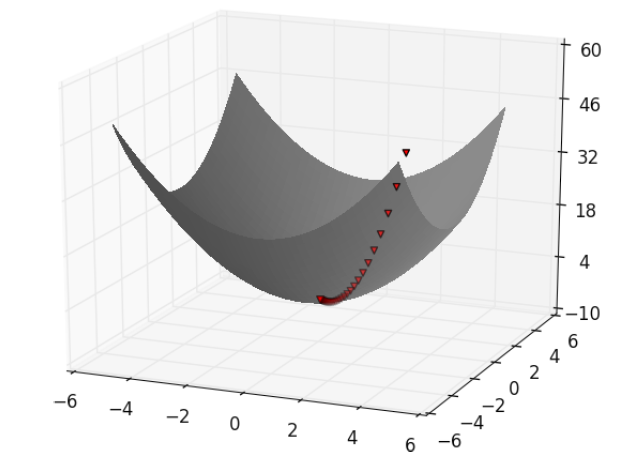

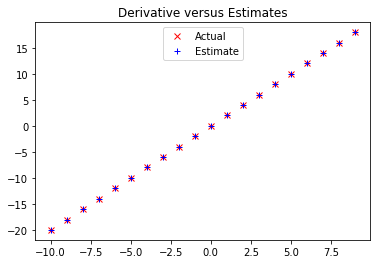

In [18]:
# Derivative approximation example
from typing import Callable
def f(x: float) -> float:
    return x*x
def f_prime(x:float) -> float:
    return 2*x

def difference_quotient(f: Callable[[float],float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

x_vals = range(-10,10)
actual_y = [f_prime(x) for x in x_vals]
est_y = [difference_quotient(f,x,1e-6) for x in x_vals]

import matplotlib.pyplot as plt

plt.title("Derivative versus Estimates")
plt.plot(x_vals,actual_y,"rx",label = "Actual")
plt.plot(x_vals,est_y,"b+",label = "Estimate")
plt.legend(loc = 9)
plt.show()


#### Partial Derivatives and Python
- If f is a function of several variables, it has many partial derivatives
- i-th partial derivative calculated by treating its function as a function of its i-th variable, holding its other variable fixed.

```python
from typing import List
Vector = List[float]
def partial_diff_quotient(f: Callable[[Vector],float],
                          v: Vector,
                          i: int,
                          h: float) -> float:
    # create a vector of zero except for the i-th index which is v_j +h
    w = [v_j + (h if i == j else 0) 
                for j, v_j in enumerate(v)]  
    return (f(w) - f(v))/h

def est_gradient(f : Callable[[Vector],float],
                 v: vector,
                 h: float = 1e-6) -> Vector:
    return [partial_diff_quotient(f,v,i,h) for i in range(len(v))]
```

- Estimating using difference quotients is computationally expensive, we prefer to use manually computed derivative if writing form scratch


#### Using the Gradient
- Here we will:
    - initialize a random vector
    - calculate its gradient
    - subtract vector v by gradient 
    - minimize the vector till it comes close to a zero vector
- In this case, we will try to minimize the "sum of squares" function

```python

import numpy as np
import random 
from typing import List

# note we are working with numpy arrays and using their associated operations
Vector = List[float]
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    # moves vector in direction of gradient
    # multiplies gradient by factor of step_size
    step = sclar_multiply(step_size,v)
    return add(v,step)

def gradient_sum_of_square(v:Vector) -> Vector:
    return [2* v_i for v_i in v]

# initialize random vector
v = [random.uniform(-10,10) for i in range(3)]

# reduce v for 1000 iterations
for epoch in range(1000):
    grad = gradient_sum_of_square(v)
    # minimize v by moving in opposite direction of gradient
    # step/learning rate is 0.01
    v = gradient_step(v,grad,-0.01)
    print(epoch,v)
assert distance(v, [0, 0, 0]) < 0.001
    
```

In [19]:
# Actual run of code with numpy
import numpy as np
import random 
# note we are working with numpy arrays and using their associated operations

def gradient_step(v, gradient, step_size) :
    # moves vector in direction of gradient
    # multiplies gradient by factor of step_size
    step = step_size*v
    return v + step

def gradient_sum_of_square(v) :
    return [2* v_i for v_i in v]

# initialize random vector
v = np.array([random.uniform(-10,10) for i in range(3)])
print(f"v is {v} it should get close to [0,0,0]")

# reduce v for 1000 iterations
for epoch in range(1001):
    grad = gradient_sum_of_square(v)
    # minimize v by moving in opposite direction of gradient
    # step/learning rate is 0.01
    v = gradient_step(v,grad,-0.01)
    if epoch % 100 == 0:
        print(epoch,v)
assert np.linalg.norm(v-[0,0,0]) < 0.001, "No"

v is [-7.44744603  3.55353748 -7.05244473] it should get close to [0,0,0]
0 [-7.37297157  3.51800211 -6.98192029]
100 [-2.69874605  1.28770255 -2.55560863]
200 [-0.98782833  0.47134078 -0.93543541]
300 [-0.36157712  0.17252597 -0.34239961]
400 [-0.13234892  0.06315008 -0.12532933]
500 [-0.04844398  0.02311497 -0.04587459]
600 [-0.01773207  0.00846083 -0.01679158]
700 [-0.00649051  0.00309694 -0.00614626]
800 [-0.00237574  0.00113358 -0.00224973]
900 [-0.0008696   0.00041493 -0.00082347]
1000 [-0.0003183   0.00015188 -0.00030142]


#### Choosing Step Size

- Fixed step size
- gradually shrink step size over time
- choose step that minimizes value of function (not feasible)

- Small fixed: long time to do descent
- large fixed: make function too large or undefined

#### Fit models with gradient descent

- Use gradient descent to fit models to data
- Typical case: have dataset, have some hypothesized model that fits data and depends on parameters provided by data
- Loss function: tells us how good model fits, smaller the loss the better
- Thus, we use gradient descent to find parameters such that loss is minimized
- Consider

```python
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
# we know the linear relationship given to us
```
- If we didn't how would we discover this relationship?
- We could use gradient descent to find m,b such that average squared error is minimized

```python
def linear_gradient(x:float,y:float,theta: Vector) -> Vector:
    slope, intercept = theta
    pred = slope * x + intercept
    error = predicted-y
    sq_error = error ** 2 # sqaure error
    grad = [2*error*x,2*error] # gradient of squared error, and 2*error
    return grad
```
- Note that, we want to optimize two parameters, m, the slope and b, the y-intercept. Thus, we take two derivatives:
    - Deriavtive of E with respect to m, where everything else is a constant
    - Derivative of E with respect to b, where everything else is a constant
\begin{equation}
 E^2 = (mx+b-y)^2 
 \end{equation}
 \begin{equation}
 \frac{dE^2}{dm} = 2(mx+b-y)x = 2Ex
 \end{equation}
 \begin{equation}
 \frac{dE^2}{db} = 2(mx+b-y) = 2E
 \end{equation}

##### For one point
- If we have Large error, error variable positive, and 2 * error is positive. We know if we increase 2*error, intercept will increase will make error larger

- First term: 2 * error * x, has same sign as x. If x positive, small increases to slope make prediction and error larger. For negative x, small increases in slope will make prediction and hence error smaller.

##### For dataset
- We use MSE. Gradient of MSE is mean of individual gradients.
- Algorithm:
    - Random theta
    - Mean of gradients
    - Adjust theta in that direction
    - Repeat
- Many epochs should get good parameters

#### Algoirthm

```python
# known inputs and outputs
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001
for epoch in range(5000):
    # Compute the mean of the gradients
    # note vector_mean takes mean elementwise
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


```


            

In [20]:
# implemnetation
import numpy as np
import random
def linear_gradient(x,y,theta):
    m,b = theta
    pred = x * m + b
    error = pred-y
    sq_error = (pred-y)**2
    grad = np.array([2*error*x,2*error])
    return grad

def elemwise_mean(v):
    return np.mean(v,axis = 0)
    
# known that relation is y = 20x+5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
# initialize random m and b
theta = [random.uniform(-1,1),random.uniform(-1,1)]
lr = 0.001
for epoch in range(5000):
    grad = elemwise_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # step opposite to gradient direction, scale gradient by factor of lr
    theta = theta + (-lr*grad)
    if epoch % 500 == 0:
        print(f"epoch {epoch}, m: {theta[0]}, b: {theta[1]}")
m,b = theta
print(theta)
print(m)
print(b)

epoch 0, m: 33.61436527521945, b: -0.4132927826753151
epoch 500, m: 19.99880658418001, b: 3.0129619429491465
epoch 1000, m: 19.999561274260877, b: 4.269521380862107
epoch 1500, m: 19.999838714829362, b: 4.7314600940207665
epoch 2000, m: 19.99994070804617, b: 4.901278861264349
epoch 2500, m: 19.99997820298187, b: 4.963707951718667
epoch 3000, m: 19.99999198693973, b: 4.9866582498406755
epoch 3500, m: 19.999997054223908, b: 4.995095281039697
epoch 4000, m: 19.999998917068325, b: 4.998196918111017
epoch 4500, m: 19.999999601890647, b: 4.99933714768885
[19.99999985  4.99975583]
19.999999853353096
4.999755832815185


#### Minibatch Gradient Descent
- Using all x,y pairs or whole dataset to determine gradient is computationally expensive for large datasets. So an alternative is to make and use batches. Batches are sampled data, for which we compute the gradient for

```python

# batch generation
from typing import TypeVar, List, Iterator
T = TypeVar('T')  #  this  allows  us  to  type  "generic"  functions
# Typevar(T) makes a generic function s.t T is a single type of data and its outputs will be batches of 
# that data

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates  `batch_size`-sized  minibatches  from  the  dataset"""
    #  start  indexes  0,  batch_size,  2  *  batch_size,  ...
    #picks out points
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    #shuffles based on boolean
    if shuffle: random.shuffle(batch_starts)  #  shuffle  the  batches
    # produces batches
    for start in batch_starts: 
        end = start + batch_size
        yield dataset[start:end]
   
# known that relation is y = 20x+5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
# gradient descent code
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(1000):
    # lazy generate batches
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"
```

#### Stochastic Gradient Descent

- Only uses one sample at a time to compute direction

``` python

# known that relation is y = 20x+5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"
```
            


In [21]:
# Implementation of Minibatch (stochastic is easy to follow)

import numpy as np
import random

def make_batch(data,
              batch_size,
              shuffle = True): # produces an iterator:
    batch_starts = [start for start in range(0,data.shape[0],batch_size)]
    if shuffle: random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield data[start:end,:]
        
# known that relation is y = 20x+5
inputs = np.array([(x, 20 * x + 5) for x in range(-50, 50)])
# initialize random m and b
theta = [random.uniform(-1,1),random.uniform(-1,1)]
lr = 0.001
for epoch in range(1000):
    for batch in make_batch(inputs,20):
        grad = elemwise_mean([linear_gradient(x,y, theta) for x,y in batch])
    # step opposite to gradient direction, scale gradient by factor of lr
        theta = theta + (-lr*grad)
    if epoch % 100 == 0:
        print(f"epoch {epoch}, m: {theta[0]}, b: {theta[1]}")
m,b = theta
print(f"theta:{theta},\n m:{theta[0]}, \n b: {theta[1]} ")
        


epoch 0, m: 18.18460613316703, b: -2.500668942869642
epoch 100, m: 19.9376669860909, b: 3.446366302118182
epoch 200, m: 19.998803698326125, b: 4.547782023447656
epoch 300, m: 20.019369942747534, b: 4.8725305302426944
epoch 400, m: 19.998460450980087, b: 4.973100687418069
epoch 500, m: 19.9997440200054, b: 4.992911669592981
epoch 600, m: 19.999716455521632, b: 4.998224905394851
epoch 700, m: 19.999990077865764, b: 4.999654173933394
epoch 800, m: 20.000013006344734, b: 4.999935253697281
epoch 900, m: 20.00000425049047, b: 4.999979491092621
theta:[20.00000007  4.99999627],
 m:20.00000006581456, 
 b: 4.9999962685643995 


In [22]:
# stochastic implementation
import numpy as np
import random
inputs = np.array([(x, 20 * x + 5) for x in range(-50, 50)])
# initialize random m and b
theta = [random.uniform(-1,1),random.uniform(-1,1)]
lr = 0.001
for epoch in range(1000):
    for x,y in inputs:
        grad = linear_gradient(x,y, theta)
    # step opposite to gradient direction, scale gradient by factor of lr
        theta = theta + (-lr*grad)
    if epoch % 100 == 0:
        print(f"epoch {epoch}, m: {theta[0]}, b: {theta[1]}")
m,b = theta
print(f"theta:{theta},\n m:{theta[0]}, \n b: {theta[1]} ")

epoch 0, m: 20.08858509857943, b: 0.5909399188523949
epoch 100, m: 20.001103877943056, b: 4.945057695877058
epoch 200, m: 20.000013758882506, b: 4.999315351123015
epoch 300, m: 20.000000169872152, b: 4.999991467319326
epoch 400, m: 19.99999999537751, b: 4.9999998949439295
epoch 500, m: 19.999999999138947, b: 4.999999999781489
epoch 600, m: 20.00000001348556, b: 5.000000000464665
epoch 700, m: 19.999999987217727, b: 5.000000002002734
epoch 800, m: 19.999999987217727, b: 5.000000002002734
epoch 900, m: 19.999999987217727, b: 5.000000002002734
theta:[19.99999999  5.        ],
 m:19.99999999461245, 
 b: 5.0000000024677895 
